In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

2024-05-15 14:11:23.291456: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 14:11:24.435444: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(y_test)

[7 2 1 ... 4 5 6]


(60000, 28, 28)


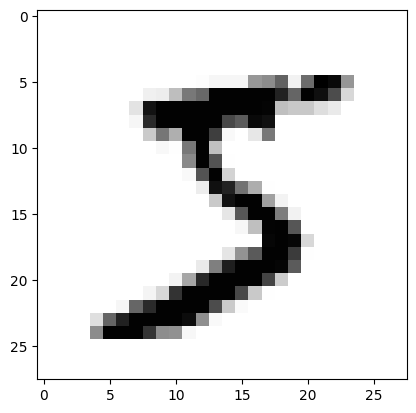

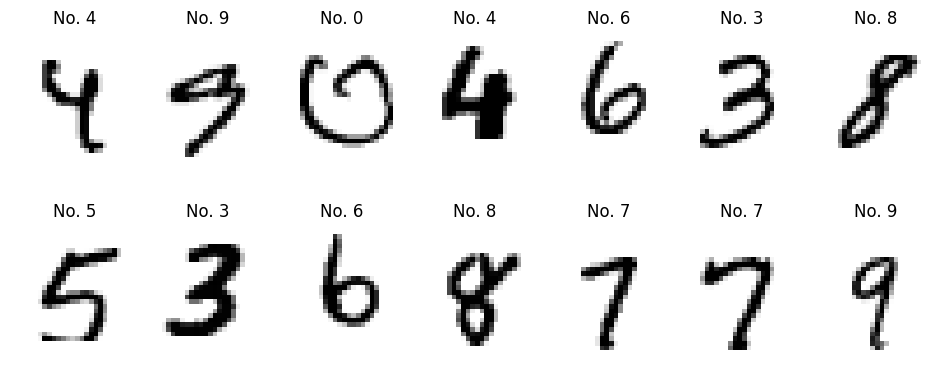

In [3]:
print(x_train.shape)
a = np.array(x_train[0])
plt.imshow(a, cmap='Grays')
plt.show()

np.random.seed(123)

rand_14 = np.random.randint(0, x_train.shape[0],14)

sample_digits = x_train[rand_14]
sample_labels = y_train[rand_14]
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap=plt.cm.binary)
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/home/grey/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-05-15 14:11:26.819613: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-15 14:11:26.844892: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipp

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8000 - loss: 11.0086 - val_accuracy: 0.8874 - val_loss: 0.8026
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9080 - loss: 0.5603 - val_accuracy: 0.9260 - val_loss: 0.4230
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9351 - loss: 0.2881 - val_accuracy: 0.9328 - val_loss: 0.3777
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9448 - loss: 0.2178 - val_accuracy: 0.9369 - val_loss: 0.3337
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9528 - loss: 0.1925 - val_accuracy: 0.9449 - val_loss: 0.2971
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9582 - loss: 0.1623 - val_accuracy: 0.9480 - val_loss: 0.2675
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9607 - loss: 0.1427 - val_accuracy: 0.9447 - val_loss: 0.2699
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9641 - loss: 0.1338 - val_accuracy: 0

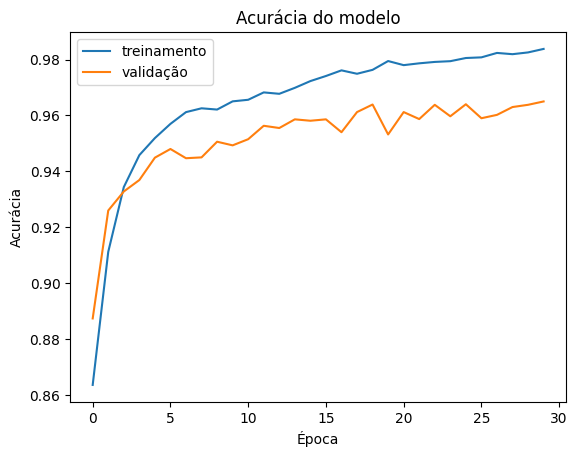

In [6]:
history = model.fit(x_train, y_train, epochs=30, batch_size=100, validation_data=(x_test, y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['treinamento', 'validação'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step


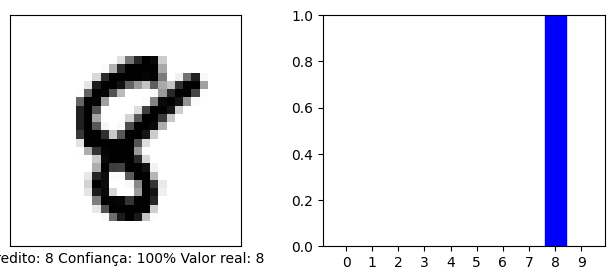

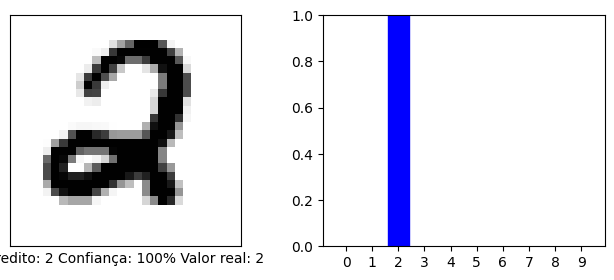

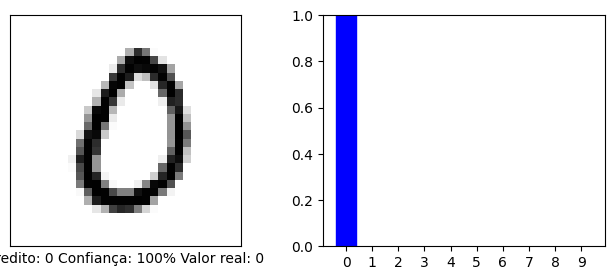

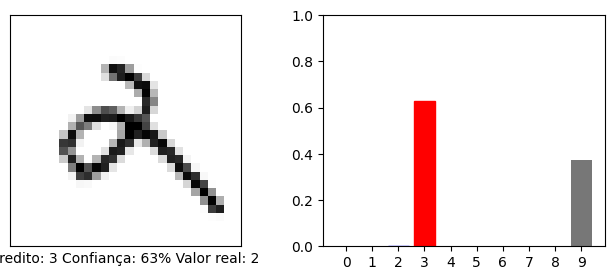

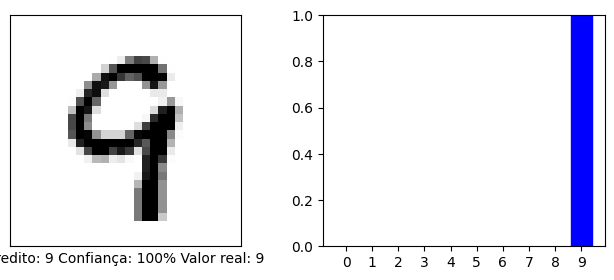

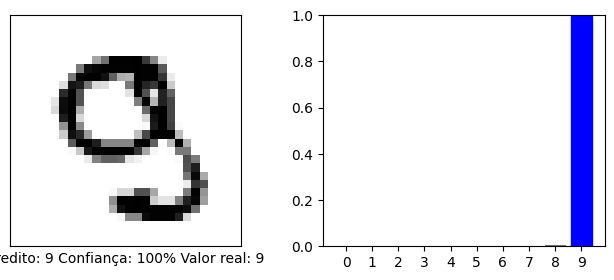

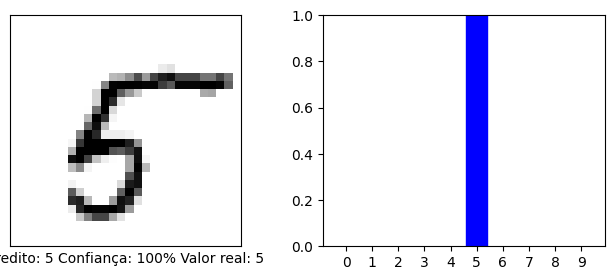

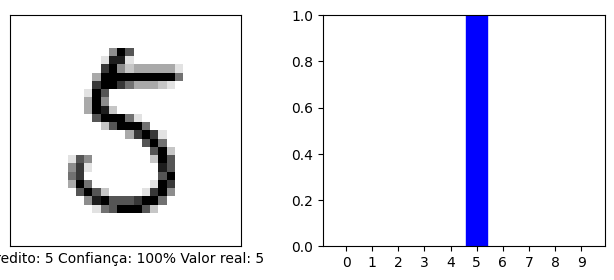

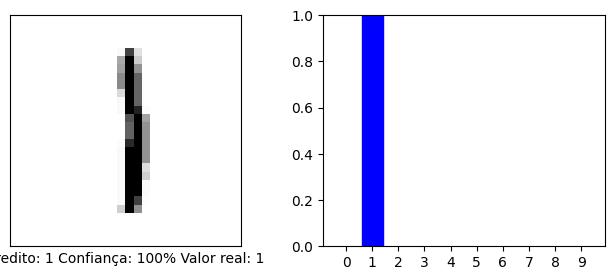

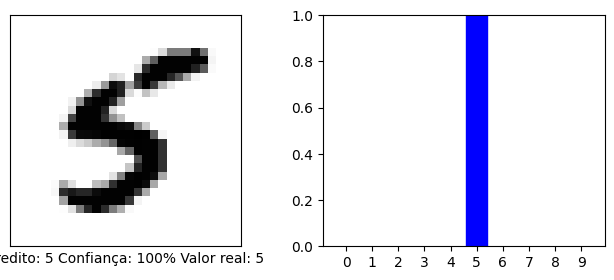

In [7]:
pr = model.predict(x_test)

class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
i = 146

def plot_image(prediction_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(prediction_array)
  plt.xlabel('Predito: {} Confiança: {:2.0f}% Valor real: {}'.format(predicted_label, 100*np.max(prediction_array), true_label))

def plot_rate(prediction_array, true_label):
  plt.grid(False)
  plt.xticks(range(10), class_names)
  thisplot = plt.bar(range(10), prediction_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(prediction_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

for j in range(10):
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    plot_image(pr[i+j], y_test[i+j], x_test[i+j])
    plt.subplot(1,2,2)
    plot_rate(pr[i+j], y_test[i+j])
    plt.show()
